# Creating categories in Spotify Data Set 

In [7]:
# importing libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [8]:
path = '/Users/brookecoffey/Desktop/DataAnalyticsTy/Achievement 6 /Spotify Project'

In [9]:
df = pd.read_pickle(os.path.join(path,'01 Data','02 Prepared Data','df_updated_6.2.pkl'))

In [10]:
df.head()

,ts,platform,ms_played,conn_country,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,spotify_track_uri,episode_name,episode_show_name,...,skipped,offline,latitude,longitude,region,minutes_seconds,year,month,day_of_week,hour_of_day
0,2012-07-17 02:48:23,"iOS 5.1.1 (iPod4,1)",231177,US,It's Time,Imagine Dragons,Continued Silence EP,spotify:track:40xtweuHBkLXNMO3xCK5AZ,NaN,NaN,...,other,False,40.1678,-80.2591,Pennsylvania,03:51,2012,7,1,2
1,2012-07-17 22:26:20,"iOS 5.1.1 (iPod4,1)",25727,US,Jump (feat. Nelly Furtado),Flo Rida,R.O.O.T.S. (Route of Overcoming the Struggle),spotify:track:4uGucgzv0ydi35DgAlsTQ4,NaN,NaN,...,skipped,False,40.1678,-80.2591,Pennsylvania,00:25,2012,7,1,22
2,2012-07-17 22:26:23,"iOS 5.1.1 (iPod4,1)",3436,US,I Know You Want Me (Calle Ocho),Pitbull,Pitbull Starring In Rebelution,spotify:track:5RzFJd6W40SDTyZkX6xx45,NaN,NaN,...,skipped,False,40.1678,-80.2591,Pennsylvania,00:03,2012,7,1,22
3,2012-07-17 22:26:24,"iOS 5.1.1 (iPod4,1)",1532,US,Over And Over,Nelly,6 Pack,spotify:track:2Gfr96HuhYqGcteLv9XUJP,NaN,NaN,...,skipped,False,40.1678,-80.2591,Pennsylvania,00:01,2012,7,1,22
4,2012-07-17 22:26:26,"iOS 5.1.1 (iPod4,1)",1486,US,Pause,Pitbull,Planet Pit (Deluxe Version),spotify:track:0c7wqpBLOTFr1yb70LHGFM,NaN,NaN,...,skipped,False,40.1678,-80.2591,Pennsylvania,00:01,2012,7,1,22


In [11]:
df.columns

Index(['ts', 'platform', 'ms_played', 'conn_country',
       'master_metadata_track_name', 'master_metadata_album_artist_name',
       'master_metadata_album_album_name', 'spotify_track_uri', 'episode_name',
       'episode_show_name', 'spotify_episode_uri', 'reason_start',
       'reason_end', 'shuffle', 'skipped', 'offline', 'latitude', 'longitude',
       'region', 'minutes_seconds', 'year', 'month', 'day_of_week',
       'hour_of_day'],
      dtype='object')

In [12]:
df.shape

(173285, 24)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173285 entries, 0 to 173459
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   ts                                 173285 non-null  datetime64[ns]
 1   platform                           173285 non-null  object        
 2   ms_played                          173285 non-null  int64         
 3   conn_country                       173285 non-null  object        
 4   master_metadata_track_name         170643 non-null  object        
 5   master_metadata_album_artist_name  170643 non-null  object        
 6   master_metadata_album_album_name   170643 non-null  object        
 7   spotify_track_uri                  170643 non-null  object        
 8   episode_name                       1975 non-null    object        
 9   episode_show_name                  1975 non-null    object        
 10  spotify_episode_uri 

# Creating a dataframe grouped by song played, including count of skipped, count of not skipped and count of other from the skipped column

In [14]:
df_tracks = df[['master_metadata_track_name', 'skipped']]

In [15]:
df_tracks.shape

(173285, 2)

In [16]:
df_tracks.isnull().sum()

master_metadata_track_name    2642
skipped                          0
dtype: int64

In [17]:
df_tracks.dropna(inplace=True)

/var/folders/hg/rtfjsgrs3cz8yw53zn0slldm0000gn/T/ipykernel_57174/315054497.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tracks.dropna(inplace=True)


In [18]:
df_tracks.shape

(170643, 2)

# Creating a new calculation of the ratio of times skipped to times not skipped

In [19]:
# Grouping the tracks dataframe by track, and counting the number of times for each occurence in the skipped column
grouped_tracks = df_tracks.groupby('master_metadata_track_name')['skipped'].value_counts().unstack(fill_value=0)

In [20]:
grouped_tracks

skipped,not skipped,other,skipped
master_metadata_track_name,,,
!,0,1,0
! (feat. Bishop Nehru),0,0,1
"""Christen, ätzet diesen Tag"", BWV 63: I. Choral ""Christen, ätzet diesen Tag""",1,0,0
#1,2,4,1
#10,0,1,0
...,...,...,...
見上げてごらん夜の星を,1,0,0
赤の同盟,1,0,0
香港戀歌,3,0,0


In [21]:
grouped_tracks.describe()

skipped,not skipped,other,skipped
count,26445.000000,26445.000000,26445.000000
mean,2.820306,1.335224,2.297221
std,7.151197,4.064770,6.477577
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000
75%,2.000000,1.000000,1.000000
max,325.000000,481.000000,75.000000


## Based on the results above, there are some songs that were only played once and either skipped or not skipped, leading to null and infinity responses.  I can set the parameters of those songs to fill a category 'only played once'.  Filtering out those values, I can determine the ratio for songs listened to more than once 

In [22]:
# Creating a dataframe with the count of each track  
track_counts = df_tracks['master_metadata_track_name'].value_counts().reset_index()
track_counts.columns = ['master_metadata_track_name', 'count']

In [23]:
track_counts

,master_metadata_track_name,count
0,Tent in a Thunderstorm,881
1,"RAF (feat. A$AP Rocky, Playboi Carti, Quavo, L...",190
2,Photosynthesis,176
3,Nights,159
4,"12.38 (feat. 21 Savage, Ink & Kadhja Bonet)",156
...,...,...
26440,Tranquillity - Remastered 1994,1
26441,"Gee Baby, Ain't I Good To You - Alternate Take...",1
26442,"Générique - Bande originale du film ""Ascenseur...",1
26443,L'assassinat de Carala - Bande originale du fi...,1


In [24]:
# filtering out tracks that only appear once 
filtered_tracks = track_counts[track_counts['count'] > 1].reset_index()

In [25]:
filtered_tracks.shape

(13088, 3)

In [26]:
filtered_tracks.columns

Index(['index', 'master_metadata_track_name', 'count'], dtype='object')

In [27]:
grouped_tracks_filtered = pd.merge(filtered_tracks, grouped_tracks, on=['master_metadata_track_name'], how='left')


In [28]:
grouped_tracks_filtered.shape

(13088, 6)

In [29]:
grouped_tracks_filtered.describe()

,index,count,not skipped,other,skipped
count,13088.000000,13088.000000,13088.000000,13088.000000,13088.000000
mean,6543.500000,12.017573,5.223640,2.410987,4.382946
std,3778.324496,20.507946,9.573077,5.557691,8.716477
min,0.000000,2.000000,0.000000,0.000000,0.000000
25%,3271.750000,2.000000,1.000000,0.000000,0.000000
50%,6543.500000,4.000000,2.000000,1.000000,1.000000
75%,9815.250000,11.000000,5.000000,3.000000,3.000000
max,13087.000000,881.000000,325.000000,481.000000,75.000000


In [30]:
# Calculating the skipped:not-skipped ratio to determine how often songs are skipped regardless of times played
grouped_tracks_filtered['skipped_ratio'] = grouped_tracks_filtered['skipped'] / grouped_tracks_filtered['not skipped']

Text(0.5, 1.0, 'skipped_ratio')

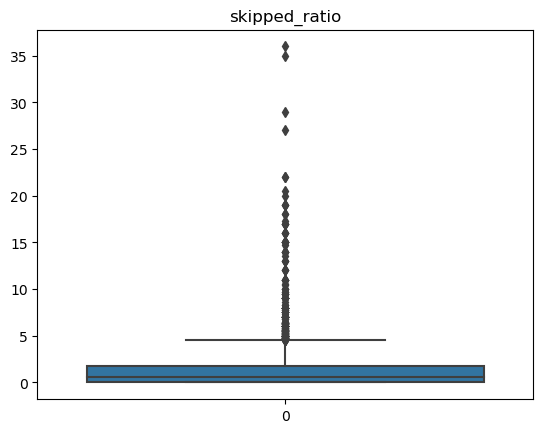

In [31]:
# visualizing the distribution of the skipped ratio
sns.boxplot(data=grouped_tracks_filtered['skipped_ratio'])
plt.title('skipped_ratio')

Text(0.5, 1.0, 'skipped_ratio')

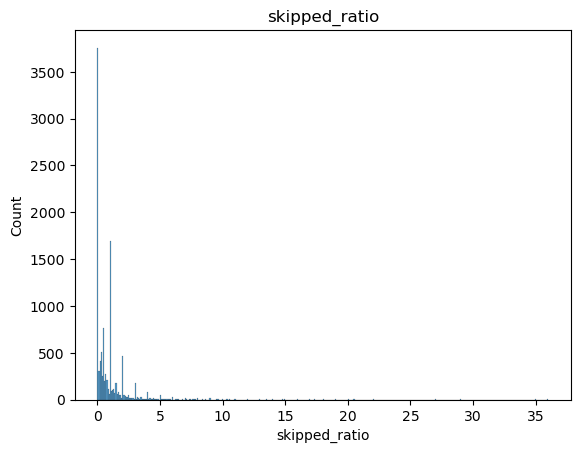

In [32]:
sns.histplot(data=grouped_tracks_filtered['skipped_ratio'], bins='auto')
plt.title('skipped_ratio')

In [33]:
grouped_tracks_filtered.head()

,index,master_metadata_track_name,count,not skipped,other,skipped,skipped_ratio
0,0,Tent in a Thunderstorm,881,325,481,75,0.230769
1,1,"RAF (feat. A$AP Rocky, Playboi Carti, Quavo, L...",190,106,31,53,0.500000
2,2,Photosynthesis,176,88,18,70,0.795455
3,3,Nights,159,95,20,44,0.463158
4,4,"12.38 (feat. 21 Savage, Ink & Kadhja Bonet)",156,83,31,42,0.506024


In [34]:
grouped_tracks_filtered.tail()

,index,master_metadata_track_name,count,not skipped,other,skipped,skipped_ratio
13083,13083,Informer,2,0,0,2,inf
13084,13084,Tell Your Friends,2,0,2,0,NaN
13085,13085,Bartier Cardi (feat. 21 Savage),2,2,0,0,0.0
13086,13086,Pinball II (feat .Correy C),2,1,1,0,0.0
13087,13087,98.6,2,0,2,0,NaN


In [35]:
grouped_tracks_filtered.sort_values(by=['skipped_ratio'], ascending=False)


,index,master_metadata_track_name,count,not skipped,other,skipped,skipped_ratio
4972,4972,Ziggy Stardust - 2012 Remaster,6,0,5,1,inf
7145,7145,Fuck The World (Summer in London),3,0,2,1,inf
7154,7154,You Get What You Give,3,0,1,2,inf
9125,9125,Conga!,2,0,1,1,inf
9127,9127,Everything In Its Right Place,2,0,1,1,inf
...,...,...,...,...,...,...,...
13078,13078,You Don't Have To Say You Love Me,2,0,2,0,NaN
13079,13079,"Another Brick In The Wall, Part 2 (Cover Version)",2,0,2,0,NaN
13081,13081,Been That Way,2,0,2,0,NaN
13084,13084,Tell Your Friends,2,0,2,0,NaN


In [36]:
grouped_tracks_filtered['skipped_ratio'].isnull().sum()

696

In [37]:
grouped_tracks_filtered_na = grouped_tracks_filtered[grouped_tracks_filtered['skipped_ratio'].isnull()]

In [38]:
grouped_tracks_filtered_na

,index,master_metadata_track_name,count,not skipped,other,skipped,skipped_ratio
3016,3016,Royals,13,0,13,0,NaN
3143,3143,F**k Em,12,0,12,0,NaN
3337,3337,Exit Music (For a Film),11,0,11,0,NaN
3801,3801,Take On Me,9,0,9,0,NaN
3886,3886,Love Shack - Edit,9,0,9,0,NaN
...,...,...,...,...,...,...,...
13078,13078,You Don't Have To Say You Love Me,2,0,2,0,NaN
13079,13079,"Another Brick In The Wall, Part 2 (Cover Version)",2,0,2,0,NaN
13081,13081,Been That Way,2,0,2,0,NaN
13084,13084,Tell Your Friends,2,0,2,0,NaN


In [39]:
grouped_tracks_filtered_na['not skipped'].value_counts()

0    696
Name: not skipped, dtype: int64

In [40]:
grouped_tracks_filtered_na['skipped'].value_counts()

0    696
Name: skipped, dtype: int64

## Based on the output of the above, these tracks have never been skipped, but they haven't been played through.  These comprise a true 'other' category. 

In [41]:
grouped_tracks_filtered_inf = grouped_tracks_filtered[grouped_tracks_filtered['skipped_ratio'] == float('inf')]

In [42]:
grouped_tracks_filtered_inf

,index,master_metadata_track_name,count,not skipped,other,skipped,skipped_ratio
1791,1791,"Lonely Rolling Star (From ""Katamari Damacy')",26,0,3,23,inf
1896,1896,Chocolate Milk,25,0,1,24,inf
1897,1897,レイディ・ブルース,25,0,2,23,inf
2023,2023,Heart Of The City (Ain't No Love),23,0,20,3,inf
2111,2111,Don’t Stop (feat. Young Thug),22,0,7,15,inf
...,...,...,...,...,...,...,...
13075,13075,Shut Up and Let Me Go,2,0,1,1,inf
13076,13076,Prison Life,2,0,1,1,inf
13080,13080,El Mañana - Live at Manchester Opera House,2,0,1,1,inf
13082,13082,Dog Days Are Over,2,0,0,2,inf


In [43]:
grouped_tracks_filtered_inf['skipped'].value_counts()

1     725
2     626
3     173
4      64
5      23
6       6
8       5
17      4
16      4
7       3
15      3
18      3
23      2
10      1
12      1
11      1
24      1
21      1
22      1
20      1
14      1
Name: skipped, dtype: int64

In [44]:
grouped_tracks_filtered_inf['not skipped'].value_counts()

0    1649
Name: not skipped, dtype: int64

## Based on the output above, tracks with a skipped ratio of infinity have never been played through completely.  These can be labeled as "always skipped'

## What comprises the 'other column'

# I need to figure out what the distribution of actual ratios is to categorize songs based on their skip ratio 

In [45]:
grouped_tracks_filtered_ratio =  grouped_tracks_filtered[~(grouped_tracks_filtered['skipped_ratio'].isna() | np.isinf(grouped_tracks_filtered['skipped_ratio']))]


In [46]:
grouped_tracks_filtered_ratio.sort_values(by='skipped_ratio', ascending=False)

,index,master_metadata_track_name,count,not skipped,other,skipped,skipped_ratio
1096,1096,FIGHT,39,1,2,36,36.0
997,997,Great Dane,42,1,6,35,35.0
1540,1540,Nigga Needs,30,1,0,29,29.0
1539,1539,Another Time,30,1,2,27,27.0
1805,1805,One Night,26,1,3,22,22.0
...,...,...,...,...,...,...,...
8749,8749,Be Sweet,3,2,1,0,0.0
8750,8750,CHAIN ON (feat. JPEGMAFIA),3,3,0,0,0.0
8751,8751,Pikachu,3,3,0,0,0.0
4600,4600,Bury Me With It,6,2,4,0,0.0


In [47]:
grouped_tracks_filtered_ratio.shape

(10743, 7)

## The above dataframe properly removes null values and infinite values, allowing a more nuanced look at the ratios 

In [48]:
grouped_tracks_filtered_ratio['skipped_ratio'].describe()

count    10743.000000
mean         0.867847
std          1.604440
min          0.000000
25%          0.000000
50%          0.500000
75%          1.000000
max         36.000000
Name: skipped_ratio, dtype: float64

Text(0.5, 1.0, 'skipped_ratio after cleaning')

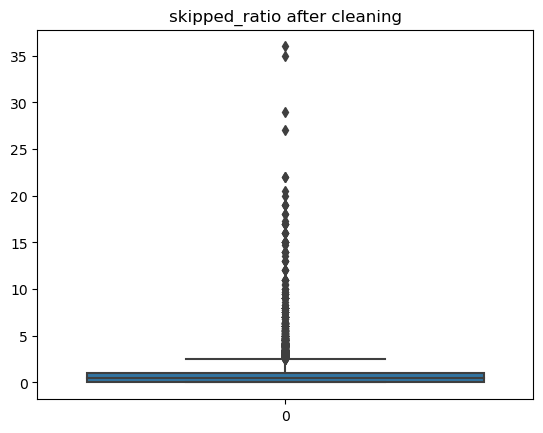

In [49]:
# visualizing the distribution of the skipped ratio
sns.boxplot(data=grouped_tracks_filtered_ratio['skipped_ratio'])
plt.title('skipped_ratio after cleaning')

# The information above can be used to assign categories based on the skipped ratio.  
# skipped ratio = infinity : 'always skipped'
# skipped ratio = null : 'other'
# skipped ratio = 0 : 'always played through'
# skipped ratio between 0 and .5 : 'unlikely to be skipped'
# skipped ratio between .5 and 1: 'likely to be skipped' 
# skipped ratio above 1: 'very likely to be skipped'

# Creating the new column with categories outlined above  

In [50]:
def get_skipped_status(skipped_ratio):
    if skipped_ratio is None:
        return 'other'
    elif skipped_ratio > 1:
        return 'very likely to be skipped'
    elif skipped_ratio > 0.5:
        return 'likely to be skipped'
    elif skipped_ratio > 0:
        return 'unlikely to be skipped'
    elif skipped_ratio == 0:
        return 'always played through'
    else:
        return 'always_skipped'

In [51]:
grouped_tracks_filtered['skip_prob'] = grouped_tracks_filtered['skipped_ratio'].apply(get_skipped_status)

In [52]:
grouped_tracks_filtered

,index,master_metadata_track_name,count,not skipped,other,skipped,skipped_ratio,skip_prob
0,0,Tent in a Thunderstorm,881,325,481,75,0.230769,unlikely to be skipped
1,1,"RAF (feat. A$AP Rocky, Playboi Carti, Quavo, L...",190,106,31,53,0.500000,unlikely to be skipped
2,2,Photosynthesis,176,88,18,70,0.795455,likely to be skipped
3,3,Nights,159,95,20,44,0.463158,unlikely to be skipped
4,4,"12.38 (feat. 21 Savage, Ink & Kadhja Bonet)",156,83,31,42,0.506024,likely to be skipped
...,...,...,...,...,...,...,...,...
13083,13083,Informer,2,0,0,2,inf,very likely to be skipped
13084,13084,Tell Your Friends,2,0,2,0,NaN,always_skipped
13085,13085,Bartier Cardi (feat. 21 Savage),2,2,0,0,0.000000,always played through
13086,13086,Pinball II (feat .Correy C),2,1,1,0,0.000000,always played through


In [53]:
grouped_tracks_filtered['skip_prob'].value_counts()

very likely to be skipped    3883
always played through        3688
likely to be skipped         2549
unlikely to be skipped       2272
always_skipped                696
Name: skip_prob, dtype: int64

# Need to tie this back into the main dataframe, and update any null values (from the songs that were only played once) to fit with the column, and build out a new category based on how frequently a song is played based on total counts

In [54]:
df_merged = pd.merge(df, grouped_tracks_filtered, on='master_metadata_track_name', how='left')


In [55]:
df_merged.head()

,ts,platform,ms_played,conn_country,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,spotify_track_uri,episode_name,episode_show_name,...,month,day_of_week,hour_of_day,index,count,not skipped,other,skipped_y,skipped_ratio,skip_prob
0,2012-07-17 02:48:23,"iOS 5.1.1 (iPod4,1)",231177,US,It's Time,Imagine Dragons,Continued Silence EP,spotify:track:40xtweuHBkLXNMO3xCK5AZ,NaN,NaN,...,7,1,2,7887.0,3.0,0.0,2.0,1.0,inf,very likely to be skipped
1,2012-07-17 22:26:20,"iOS 5.1.1 (iPod4,1)",25727,US,Jump (feat. Nelly Furtado),Flo Rida,R.O.O.T.S. (Route of Overcoming the Struggle),spotify:track:4uGucgzv0ydi35DgAlsTQ4,NaN,NaN,...,7,1,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2012-07-17 22:26:23,"iOS 5.1.1 (iPod4,1)",3436,US,I Know You Want Me (Calle Ocho),Pitbull,Pitbull Starring In Rebelution,spotify:track:5RzFJd6W40SDTyZkX6xx45,NaN,NaN,...,7,1,22,5719.0,5.0,1.0,2.0,2.0,2.0,very likely to be skipped
3,2012-07-17 22:26:24,"iOS 5.1.1 (iPod4,1)",1532,US,Over And Over,Nelly,6 Pack,spotify:track:2Gfr96HuhYqGcteLv9XUJP,NaN,NaN,...,7,1,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2012-07-17 22:26:26,"iOS 5.1.1 (iPod4,1)",1486,US,Pause,Pitbull,Planet Pit (Deluxe Version),spotify:track:0c7wqpBLOTFr1yb70LHGFM,NaN,NaN,...,7,1,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
df_merged.shape

(173285, 31)

In [57]:
df_merged['skip_prob'].value_counts().sum()

157286

In [58]:
df_merged['skip_prob'].isnull().sum()

15999

In [59]:
df_merged_counts = pd.merge(df_merged, track_counts, on='master_metadata_track_name', how='left')

In [60]:
df_merged_counts

,ts,platform,ms_played,conn_country,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,spotify_track_uri,episode_name,episode_show_name,...,day_of_week,hour_of_day,index,count_x,not skipped,other,skipped_y,skipped_ratio,skip_prob,count_y
0,2012-07-17 02:48:23,"iOS 5.1.1 (iPod4,1)",231177,US,It's Time,Imagine Dragons,Continued Silence EP,spotify:track:40xtweuHBkLXNMO3xCK5AZ,NaN,NaN,...,1,2,7887.0,3.0,0.0,2.0,1.0,inf,very likely to be skipped,3.0
1,2012-07-17 22:26:20,"iOS 5.1.1 (iPod4,1)",25727,US,Jump (feat. Nelly Furtado),Flo Rida,R.O.O.T.S. (Route of Overcoming the Struggle),spotify:track:4uGucgzv0ydi35DgAlsTQ4,NaN,NaN,...,1,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,2012-07-17 22:26:23,"iOS 5.1.1 (iPod4,1)",3436,US,I Know You Want Me (Calle Ocho),Pitbull,Pitbull Starring In Rebelution,spotify:track:5RzFJd6W40SDTyZkX6xx45,NaN,NaN,...,1,22,5719.0,5.0,1.0,2.0,2.0,2.000000,very likely to be skipped,5.0
3,2012-07-17 22:26:24,"iOS 5.1.1 (iPod4,1)",1532,US,Over And Over,Nelly,6 Pack,spotify:track:2Gfr96HuhYqGcteLv9XUJP,NaN,NaN,...,1,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4,2012-07-17 22:26:26,"iOS 5.1.1 (iPod4,1)",1486,US,Pause,Pitbull,Planet Pit (Deluxe Version),spotify:track:0c7wqpBLOTFr1yb70LHGFM,NaN,NaN,...,1,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173280,2023-08-23 12:19:26,ios,917,US,Like a Virgin,Madonna,Like a Virgin,spotify:track:1ZPlNanZsJSPK5h9YZZFbZ,None,None,...,2,12,8489.0,3.0,0.0,0.0,3.0,inf,very likely to be skipped,3.0
173281,2023-08-23 12:19:27,ios,960,US,Never Gonna Give You Up,Rick Astley,Whenever You Need Somebody,spotify:track:4cOdK2wGLETKBW3PvgPWqT,None,None,...,2,12,5034.0,6.0,1.0,3.0,2.0,2.000000,very likely to be skipped,6.0
173282,2023-08-23 12:19:29,ios,1280,US,Wake Me Up Before You Go-Go,Wham!,Make It Big,spotify:track:0ikz6tENMONtK6qGkOrU3c,None,None,...,2,12,4608.0,6.0,1.0,3.0,2.0,2.000000,very likely to be skipped,6.0
173283,2023-08-23 12:19:30,ios,1450,US,Our House,Madness,Madness,spotify:track:1qV6e4ITnfGmA6m6Vklvbi,None,None,...,2,12,209.0,83.0,36.0,30.0,17.0,0.472222,unlikely to be skipped,83.0


In [61]:
df_merged_counts.loc[df_merged_counts['count_y'] == 1, 'skip_prob'] = df_merged_counts['reason_end']

In [62]:
df_merged_counts['skip_prob'].value_counts()

very likely to be skipped       62788
unlikely to be skipped          41101
likely to be skipped            38429
always played through           13246
trackdone                        6216
fwdbtn                           3386
endplay                          2655
always_skipped                   1722
popup                             556
unexpected-exit-while-paused      174
unknown                           130
uriopen                            88
clickrow                           39
backbtn                            32
logout                             31
playbtn                            23
remote                             11
unexpected-exit                     9
clickside                           3
                                    2
trackerror                          2
Name: skip_prob, dtype: int64

In [63]:
df_merged_counts['skip_prob'].isnull().sum()

2642

# The number above makes sense with the podcast episodes. 

# Using the count column to categorize songs 

In [64]:
df_merged_counts['count_y'].describe()

count    170643.000000
mean         43.410096
std          69.935661
min           1.000000
25%           8.000000
50%          31.000000
75%          60.000000
max         881.000000
Name: count_y, dtype: float64

<Axes: >

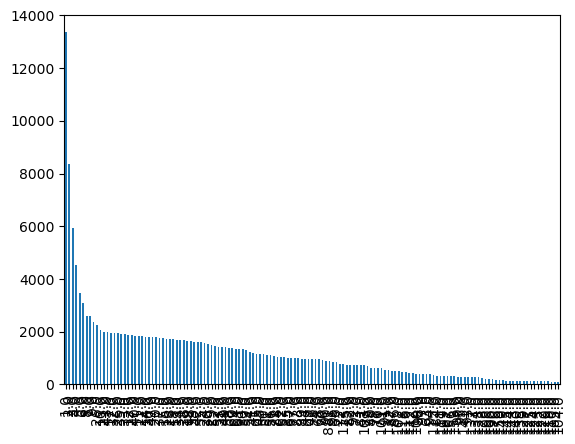

In [65]:
df_merged_counts['count_y'].value_counts().plot.bar()

In [66]:
result = []

for value in df_merged_counts["count_y"]:
    if value == 1:
        result.append("Only Played Once")
    elif value > 1 and value <= 8:
        result.append("Low Frequency")
    elif value > 8 and value <= 31:
        result.append('Medium Frequency')
    elif value > 31 and value <= 60:
        result.append('Above Average Frequency')
    elif value > 60:
        result.append('Highest Frequency')
    else:
        result.append("NaN")

In [67]:
df_merged_counts['listening_frequency'] = result

In [68]:
df_merged_counts['listening_frequency'].value_counts(dropna=False)

Above Average Frequency    42747
Highest Frequency          42471
Medium Frequency           41564
Low Frequency              30504
Only Played Once           13357
NaN                         2642
Name: listening_frequency, dtype: int64

In [69]:
df_merged_counts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173285 entries, 0 to 173284
Data columns (total 33 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   ts                                 173285 non-null  datetime64[ns]
 1   platform                           173285 non-null  object        
 2   ms_played                          173285 non-null  int64         
 3   conn_country                       173285 non-null  object        
 4   master_metadata_track_name         170643 non-null  object        
 5   master_metadata_album_artist_name  170643 non-null  object        
 6   master_metadata_album_album_name   170643 non-null  object        
 7   spotify_track_uri                  170643 non-null  object        
 8   episode_name                       1975 non-null    object        
 9   episode_show_name                  1975 non-null    object        
 10  spotify_episode_uri 

In [71]:
df_merged_counts.head()

,ts,platform,ms_played,conn_country,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,spotify_track_uri,episode_name,episode_show_name,...,hour_of_day,index,count_x,not skipped,other,skipped_y,skipped_ratio,skip_prob,count_y,listening_frequency
0,2012-07-17 02:48:23,"iOS 5.1.1 (iPod4,1)",231177,US,It's Time,Imagine Dragons,Continued Silence EP,spotify:track:40xtweuHBkLXNMO3xCK5AZ,NaN,NaN,...,2,7887.0,3.0,0.0,2.0,1.0,inf,very likely to be skipped,3.0,Low Frequency
1,2012-07-17 22:26:20,"iOS 5.1.1 (iPod4,1)",25727,US,Jump (feat. Nelly Furtado),Flo Rida,R.O.O.T.S. (Route of Overcoming the Struggle),spotify:track:4uGucgzv0ydi35DgAlsTQ4,NaN,NaN,...,22,NaN,NaN,NaN,NaN,NaN,NaN,fwdbtn,1.0,Only Played Once
2,2012-07-17 22:26:23,"iOS 5.1.1 (iPod4,1)",3436,US,I Know You Want Me (Calle Ocho),Pitbull,Pitbull Starring In Rebelution,spotify:track:5RzFJd6W40SDTyZkX6xx45,NaN,NaN,...,22,5719.0,5.0,1.0,2.0,2.0,2.0,very likely to be skipped,5.0,Low Frequency
3,2012-07-17 22:26:24,"iOS 5.1.1 (iPod4,1)",1532,US,Over And Over,Nelly,6 Pack,spotify:track:2Gfr96HuhYqGcteLv9XUJP,NaN,NaN,...,22,NaN,NaN,NaN,NaN,NaN,NaN,fwdbtn,1.0,Only Played Once
4,2012-07-17 22:26:26,"iOS 5.1.1 (iPod4,1)",1486,US,Pause,Pitbull,Planet Pit (Deluxe Version),spotify:track:0c7wqpBLOTFr1yb70LHGFM,NaN,NaN,...,22,NaN,NaN,NaN,NaN,NaN,NaN,fwdbtn,1.0,Only Played Once


In [73]:
# Dropping irrelevant columns that were generated from our category creation 
df_merged_counts = df_merged_counts.drop(['index','count_x', 'not skipped','other', 'skipped_y'], axis=1)

In [74]:
df_merged_counts.columns

Index(['ts', 'platform', 'ms_played', 'conn_country',
       'master_metadata_track_name', 'master_metadata_album_artist_name',
       'master_metadata_album_album_name', 'spotify_track_uri', 'episode_name',
       'episode_show_name', 'spotify_episode_uri', 'reason_start',
       'reason_end', 'shuffle', 'skipped_x', 'offline', 'latitude',
       'longitude', 'region', 'minutes_seconds', 'year', 'month',
       'day_of_week', 'hour_of_day', 'skipped_ratio', 'skip_prob', 'count_y',
       'listening_frequency'],
      dtype='object')

In [75]:
df_merged_counts.to_pickle(os.path.join(path,'01 Data','02 Prepared Data','data_with_counts.pkl'))